In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv("scorm_tracking_copy.csv", sep=";")
# data.set_index("object_id")

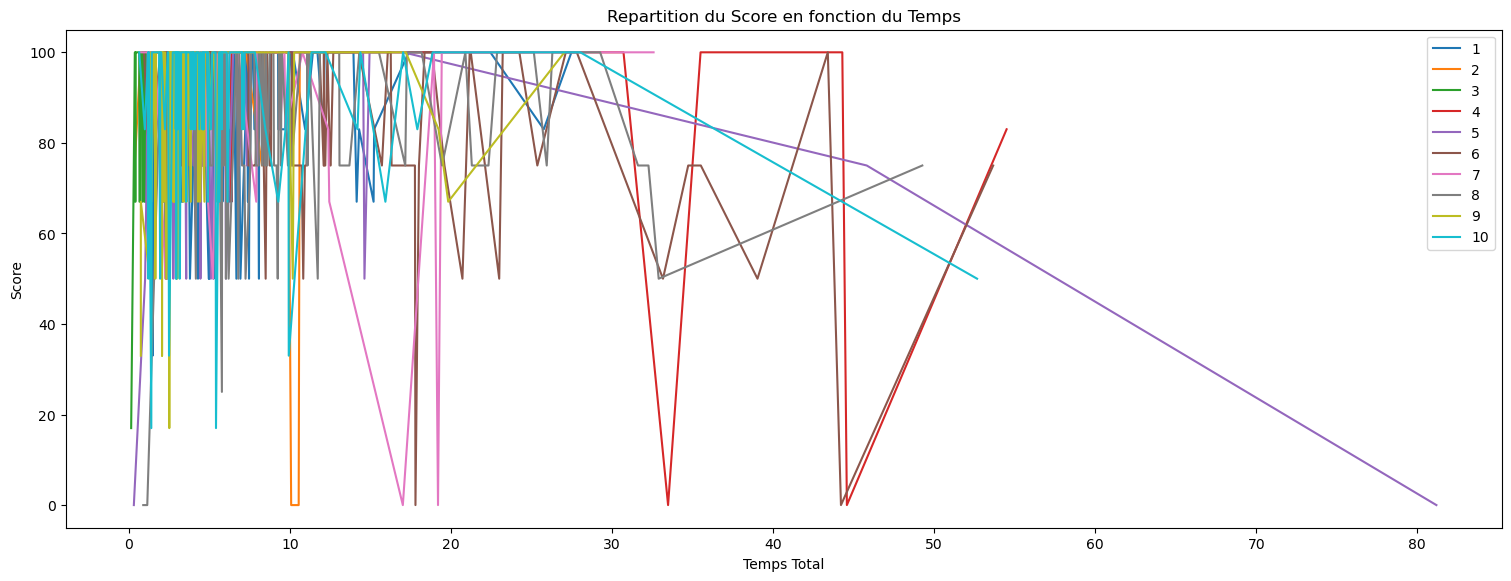

In [139]:
class TP_NumPy_Pandas_MatlabLib :
    def __init__(self, path, sep):
        self.data = pd.read_csv(path, sep=sep)
        self.data.set_index("object_id")
        super().__init__()

    def Q1(self):
        actor = self.data.groupby("object_id").actor.nunique()
        nbre_session = self.data.groupby("object_id").session_uuid.count()
        score_max =  self.data.groupby("object_id").score.max()
        score_min = self.data.groupby("object_id").score.min()
        data["score_sup"] = np.where(data["score"]>=50, 1,0)
        score_sp = data.groupby(["object_id","actor"]).score_sup.max()
        score_sp =score_sp.reset_index()
        n_admi = score_sp.groupby('object_id').score_sup.sum()
        n_actor = score_sp.groupby('object_id').score_sup.count()
        taux = (n_admi/n_actor)*100
        data.set_index("object_id")
        all = pd.DataFrame({"actor": actor, "nbre_session": nbre_session, "score_max":score_max, "score_min":score_min,"taux":taux})
        return all.sort_values(by="taux", ascending=False)

    def Q1b(self):
        print("")
        tableau = np.array(self.Q1())
        return tableau

    def Q2a(self):
        return tst.moduleData(tst.Q1().shape[0])
        # return tst.moduleData(1)

    def moduleData(self, index):
        nom_module = tst.Q1().iloc[[index-1]].index[0]
        # print(nom_module)
        all_data_for_module = self.data.loc[data["object_id"]==nom_module,:].groupby("actor")
        n_session = all_data_for_module.session_uuid.count()
        n_total_temps = all_data_for_module.temps.sum()
        score = all_data_for_module.score.max()
        need_data_module = pd.DataFrame({"n_session":n_session, "temps Total" : n_total_temps, "Score":score})
        need_data_module["Resultat Final"]=np.where(need_data_module["Score"]>=50, 1,0)
        return need_data_module
    

# MatLabLib

    def graphique(self, moduleD):
        moduleD.sort_values(by="temps Total", ascending = False)
        moduleD["temps Total"] = moduleD["temps Total"]/60
        fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
        ax.plot(moduleD["temps Total"], moduleD["Score"], label='Nom')
        ax.set_xlabel('Temps Total') 
        ax.set_ylabel('Score')  
        ax.set_title("Repartition du Score en fonction du Temps")


    def Q3a_all_Graphique_In_One(self, all_top_modulex):
        fig, ax = plt.subplots(figsize=(15, 5.7), layout='constrained')
        for i in range(len(all_top_modulex)):
            all_top_modulex[i].sort_values(by="temps Total", inplace=True)
            all_top_modulex[i]["temps Total"] = all_top_modulex[i]["temps Total"]/60
            ax.plot(all_top_modulex[i]["temps Total"], all_top_modulex[i]["Score"], label=i+1)
        ax.set_xlabel('Temps Total')
        ax.set_ylabel('Score')
        ax.set_title("Repartition du Score en fonction du Temps")
        ax.legend()

    def Q3b_diagramme_bar(self):
        fig, ax = plt.subplots(figsize = (5,2.7), layout = "constrained")
        plt.xticks(rotation= "vertical")
        dix_premier = tst.Q1().sort_values(by="taux", ascending=False).iloc[0:10]
        axis = [tst.Q1().iloc[[index]].index[0] for index in range(len(dix_premier))]
        ordonnee = dix_premier["taux"]
        ax.bar(axis, ordonnee)


    def Q4a_top3_module_Graphique(self,n_module):   
        fig, ax = plt.subplots(3,1, layout='constrained', sharex=True)
        fig.subplots_adjust(hspace=0)
        for i in range(n_module):
            self.moduleData(i+1).sort_values(by="n_session", ascending=False)
            df = self.moduleData(i+1).sort_values(by="Score", ascending=False)
            df.insert(0, 'Rang', range(1, 1 + len(df)))
            ax[i].plot(df["Rang"], df["Score"], label='Nom')
            ax[i].set_xlabel('Rang') 
            ax[i].set_ylabel('Score Max')  
            ax[i].set_title("M"+str(i+1))


    # fig, axs= plt.subplots(figsize=(5,2.7), layout = "constrained")
    def Q5a_nuage_Graphique_All_Module(self, n_module):
        # if n_module==0:
        #     n_module= self.Q1().shape[0]
        fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
        for i in range(n_module):
            df = self.moduleData(i+1).sort_values(by="Score", ascending=False)
            df.insert(0, 'Rang', range(1, 1 + len(df)))
            ax.scatter(df["Rang"], df["temps Total"]/60, label=i+1)
            ax.set_xlabel('Rang') 
            ax.set_ylabel('Temps Total en Mn')  
            ax.set_title("Nuage pour "+str(i+1)+" top modules")
        ax.legend()
        return df


    def Q6_camembert_Graphique(self,index):
        df = self.moduleData(index)
        df.insert(0, 'classe',1)
        df["classe"] = df.Score.map(lambda ligne : "Classe A" if (ligne >=80 ) else 
        ("Classe B" if (ligne>=60) else("classe C" if (ligne>=50 ) else "Classe D")))
        df.sort_values("Score")
        categorie = df.groupby("classe").classe.count()
        plt.figure(figsize=(5, 2.7), layout='constrained')
        plt.pie(categorie.values, labels=categorie.index.values , autopct="%1.2f%%")

tst = TP_NumPy_Pandas_MatlabLib("scorm_tracking_copy.csv", ";")
# tst.Q3b_diagramme_bar()
# tst.Q6_camembert_Graphique(3)

tst.Q3a_all_Graphique_In_One([tst.moduleData(i+1) for i in range(10)])
# [tst.moduleData(i+1) for i in range(10)]
# donnee = [moduleData(i) for i in range(len(dix_premier))]
# all_Graphique_In_One(donnee)



In [38]:
actor = data.groupby("object_id").actor.nunique()
nbre_session = data.groupby("object_id").session_uuid.count()
score_max =  data.groupby("object_id").score.max()
score_min = data.groupby("object_id").score.min()
t =data.where(data.score>=50).groupby("object_id").score.mean()
all = pd.DataFrame({"actor": actor, "nbre_session": nbre_session, "score_max":score_max, "score_min":score_min,"tx":t})
all
# data.insert(2, "score_sup", 1)
data["score_sup"] = np.where(data["score"]>=50, 1,0)
score_sp = data.groupby(["object_id","actor"]).score_sup.max()
score_sp =score_sp.reset_index()
n_admi = score_sp.groupby('object_id').score_sup.sum()
n_actor = score_sp.groupby('object_id').score_sup.count()
taux = (n_admi/n_actor)*100
data.set_index("object_id")
all = pd.DataFrame({"actor": actor, "nbre_session": nbre_session, "score_max":score_max, "score_min":score_min,"taux":taux})
all.sort_values(by="taux", ascending=False)
dix_premier = all.sort_values(by="taux", ascending=False).iloc[0:10]
dix_premier
top_dernier = dix_premier.iloc[[0,9],:]
top_dernier
dernier_df = np.array(dix_premier)


# 2

In [76]:
all_modules = all.sort_values(by="taux", ascending=False)
all_modules.iloc[[all_modules.shape[0]-1]].index[0]

'632-le-hibou-grand-duc'

TypeError: moduleData() missing 1 required positional argument: 'index'

In [102]:
graphique(moduleData(8))

NameError: name 'self' is not defined

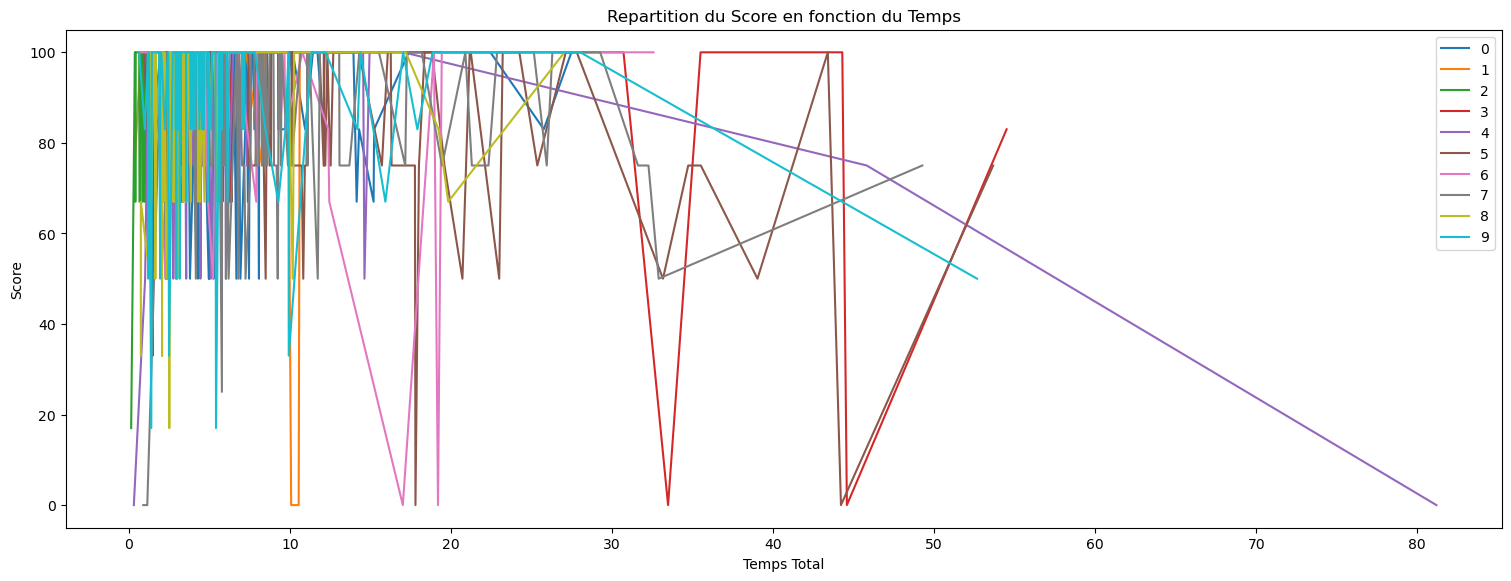

In [28]:
dix_premier
# dp = dix_premier.sort_values(by="temps Total")


# Diagramme en Bar

<BarContainer object of 10 artists>

d:\installation\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


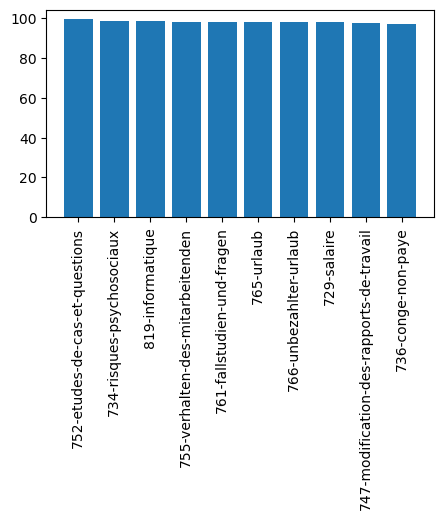

# Pour les 3 top module:

In [30]:

    # return df

C:\Users\USER\AppData\Local\Temp\ipykernel_9276\759143032.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0)


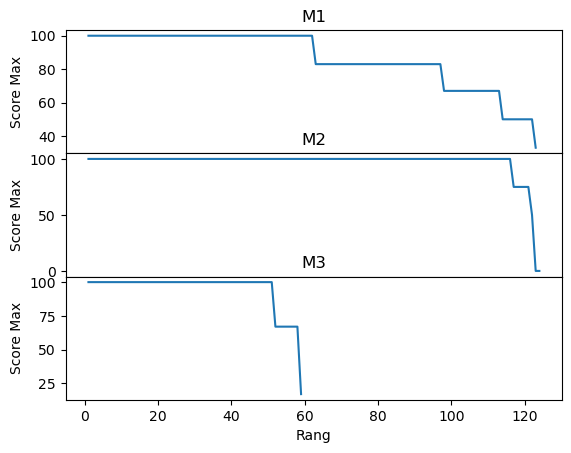

In [31]:
top3_module_Data_Graphique(3)

# Pour tout les top module:


In [32]:
# fig, axs= plt.subplots(figsize=(5,2.7), layout = "constrained")
def nuage_Graphique_All_Module(n_module):
    fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
    for i in range(n_module):
        df = moduleData(i).sort_values(by="Score", ascending=False)
        df.insert(0, 'Rang', range(1, 1 + len(df)))
        ax.scatter(df["Rang"], df["temps Total"]/60, label=i)
        ax.set_xlabel('Rang') 
        ax.set_ylabel('Temps Total en Mn')  
        ax.set_title("Nuage pour "+str(i+1)+" top modules")
    ax.legend()
    return df

,Rang,n_session,temps Total,Score,Resultat Final
actor,,,,,
ga2018_gktl@yopmail.com,1,1,353.0,100.0,1
ga2018_oqzx@yopmail.com,2,3,213.0,100.0,1
ga2018_ntbi@yopmail.com,3,4,337.0,100.0,1
ga2018_nov3@yopmail.com,4,4,348.0,100.0,1
ga2018_lprm@yopmail.com,5,6,681.0,100.0,1
...,...,...,...,...,...
dtic@mobiletic.com,118,9,3160.0,50.0,1
ga2018_xand@yopmail.com,119,3,596.0,33.0,0
ga2018_jxvk@yopmail.com,120,2,150.0,33.0,0


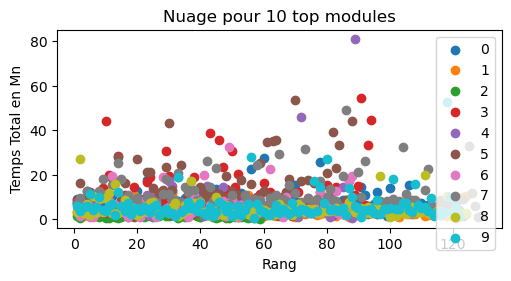

In [33]:
nuage_Graphique_All_Module(10)

In [34]:
# dd = moduleData(1)
# dd.insert(0, 'clase',1)
# dd["clase"]= (np.where(dd["Score"]>=80), "Classe A", np.where(dd["Score"]>=60 , "Classe B", "hhh"))
# # np.where(dd["Score"]>=50 & dd["Score"]<60, "Classe C", "Classe D")

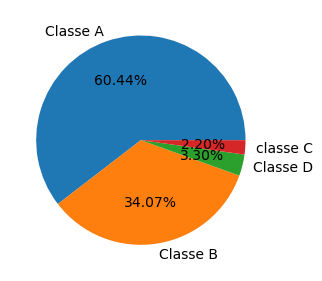

In [36]:
camembert_Graphiqu(10)

In [37]:
class TpAll:
    
    def moduleData(index):
        nom_module = all_modules.iloc[[index]].index[0]
        all_data_for_module = data.loc[data["object_id"]==nom_module,:].groupby("actor")
        n_session = all_data_for_module.session_uuid.count()
        n_total_temps = all_data_for_module.temps.sum()
        score = all_data_for_module.score.max()
        need_data_module = pd.DataFrame({"n_session":n_session, "temps Total" : n_total_temps, "Score":score})
        need_data_module["Resultat Final"]=np.where(need_data_module["Score"]>=50, 1,0)
        return need_data_module


    def graphique(moduleD):
        moduleD.sort_values(by="temps Total", ascending = False)
        moduleD["temps Total"] = moduleD["temps Total"]/60
        fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
        ax.plot(moduleD["temps Total"], moduleD["Score"], label='Nom')
        ax.set_xlabel('Temps Total') 
        ax.set_ylabel('Score')  
        ax.set_title("Repartition du Score en fonction du Temps")


    def all_Graphique_In_One(all_top_modulex):
        fig, ax = plt.subplots(figsize=(15, 5.7), layout='constrained')
        for i in range(len(all_top_modulex)):
            all_top_modulex[i].sort_values(by="temps Total", inplace=True)
            all_top_modulex[i]["temps Total"] = all_top_modulex[i]["temps Total"]/60
            ax.plot(all_top_modulex[i]["temps Total"], all_top_modulex[i]["Score"], label=i)
        ax.set_xlabel('Temps Total')
        ax.set_ylabel('Score')
        ax.set_title("Repartition du Score en fonction du Temps")
        ax.legend()


    def top3_module_Data_Graphique(n_module):   
        fig, ax = plt.subplots(3,1, layout='constrained', sharex=True)
        fig.subplots_adjust(hspace=0)
        for i in range(n_module):
            moduleData(i).sort_values(by="n_session", ascending=False)
            df = moduleData(i).sort_values(by="Score", ascending=False)
            df.insert(0, 'Rang', range(1, 1 + len(df)))
            ax[i].plot(df["Rang"], df["Score"], label='Nom')
            ax[i].set_xlabel('Rang') 
            ax[i].set_ylabel('Score Max')  
            ax[i].set_title("M"+str(i+1))
        # return df


    def nuage_Graphique_All_Module(n_module):
        fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
        for i in range(n_module):
            df = moduleData(i).sort_values(by="Score", ascending=False)
            df.insert(0, 'Rang', range(1, 1 + len(df)))
            ax.scatter(df["Rang"], df["temps Total"]/60, label=i)
            ax.set_xlabel('Rang') 
            ax.set_ylabel('Temps Total en Mn')  
            ax.set_title("Nuage pour "+str(i+1)+" top modules")
        ax.legend()
        return df


    def camembert_Graphiqu(index):
        df = moduleData(index)
        df.insert(0, 'classe',1)
        df["classe"] = df.Score.map(lambda ligne : "Classe A" if (ligne >=80 ) else 
        ("Classe B" if (ligne>=60) else("classe C" if (ligne>=50 ) else "Classe D")))
        df.sort_values("Score")
        categorie = df.groupby("classe").classe.count()
        plt.figure(figsize=(5, 2.7), layout='constrained')
        plt.pie(categorie.values, labels=categorie.index.values , autopct="%1.2f%%")